<a href="https://colab.research.google.com/github/johanaluna/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Johana_DS7_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [3]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [4]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [10]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [11]:
#join the cell_phones and population dataframes (with an inner join on geo and time).
df=pd.merge(cell_phones,population, on=['geo','time'], how='inner')
print(df.shape)
df.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [13]:
geo_country= geo_country_codes  [['geo','country']]
geo_country.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [16]:
df_merged = pd.merge(df, geo_country, on='geo')
print(df_merged.shape)
df_merged.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [17]:
df_merged['cellphone_person']=df_merged['cell_phones_total']/df_merged['population_total']
df_merged.head()

,geo,time,cell_phones_total,population_total,country,cellphone_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [22]:
df_merged[(df_merged['country'] == 'United States') & (df_merged['time'] ==2017 )]

,geo,time,cell_phones_total,population_total,country,cellphone_person
8134,usa,2017,395881000.0,324459463,United States,1.220125


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [25]:
import numpy as np
# describe your dataframe's numeric columns
df_merged.describe()


,time,cell_phones_total,population_total,cellphone_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [26]:
df_merged.describe(exclude = [np.number])

,geo,country
count,8590,8590
unique,195,195
top,mkd,Afghanistan
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [29]:
year2017 = df_merged[df_merged.time == 2017]
year2017.head()

,geo,time,cell_phones_total,population_total,country,cellphone_person
45,afg,2017,"23,929,713.0",35530081,Afghanistan,0.6735057260353557
91,ago,2017,"13,323,952.0",29784193,Angola,0.4473497737541521
137,alb,2017,"3,497,950.0",2930187,Albania,1.19376340144844
183,and,2017,"80,337.0",76965,Andorra,1.0438121223932957
219,are,2017,"19,826,224.0",9400145,United Arab Emirates,2.109140231347495


In [0]:
#code to check the values
year2017.sort_values('cell_phones_total', ascending=False)

In [36]:
# Make top5 
top5_all=year2017.nlargest(5,'cell_phones_total')
top5=top5_all[['country','cell_phones_total']]
top5.head()

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [40]:
order_celphones=df_merged.sort_values('cell_phones_total', ascending=False)
order_celphones.head(10)

,geo,time,cell_phones_total,population_total,country,cellphone_person
1496,chn,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
1495,chn,2016,"1,364,934,000.0",1403500365,China,0.9725213003418065
1494,chn,2015,"1,291,984,200.0",1397028553,China,0.9248087286588194
1493,chn,2014,"1,286,093,000.0",1390110388,China,0.9251732891877361
1492,chn,2013,"1,229,113,000.0",1382793212,China,0.8888624772913624
3595,ind,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3594,ind,2016,"1,127,809,000.0",1324171354,India,0.8517092569576913
1491,chn,2012,"1,112,155,000.0",1375198619,China,0.8087231797896388
3593,ind,2015,"1,001,056,000.0",1309053980,India,0.7647171280133154
1490,chn,2011,"986,253,000.0",1367480264,China,0.7212191838989495


In [61]:
country_usa=df_merged[(df_merged['country'] == 'United States')]
country_usa.head()
# country_usa.country.unique()

,geo,time,cell_phones_total,population_total,country,cellphone_person
8092,usa,1960,0.0,186808228,United States,0.0
8093,usa,1965,0.0,199815540,United States,0.0
8094,usa,1970,0.0,209588150,United States,0.0
8095,usa,1975,0.0,219205296,United States,0.0
8096,usa,1976,0.0,221239215,United States,0.0


In [64]:
condition_usa= country_usa[(country_usa['cell_phones_total'] > country_usa['population_total'])]
condition_usa.head()

,geo,time,cell_phones_total,population_total,country,cellphone_person
8131,usa,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,usa,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,usa,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


In [66]:
#one way to do : What was the first year that the USA had more cell phones than people?
order_usa=condition_usa.sort_values('time', ascending=True)
order_usa.head(1)

,geo,time,cell_phones_total,population_total,country,cellphone_person
8131,usa,2014,"355,500,000.0",317718779,United States,1.118914031833164


In [68]:
#Second way to do: What was the first year that the USA had more cell phones than people?
condition_usa.nsmallest(1,'time')

,geo,time,cell_phones_total,population_total,country,cellphone_person
8131,usa,2014,"355,500,000.0",317718779,United States,1.118914031833164


### Part 4. Reshape data


Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
years=[2007,2008,2009,2010,2011,2012,2013,20014,2015,2016,2017]
countries=['China', 'India', 'United States', 'Indonesia', 'Brazil']
#countries_pivot=df_merged.loc[df_merged['country'].isin(countries)]

In [89]:
years_merged=df_merged.loc[df_merged['time'].isin(years)& df_merged['country'].isin(countries)]
years_merged.head()

,geo,time,cell_phones_total,population_total,country,cellphone_person
1074,bra,2007,"120,980,103.0",191026637,Brazil,0.6333153580042348
1075,bra,2008,"150,641,403.0",192979029,Brazil,0.7806102237150339
1076,bra,2009,"169,385,584.0",194895996,Brazil,0.869107562373934
1077,bra,2010,"196,929,978.0",196796269,Brazil,1.000679428531239
1078,bra,2011,"234,357,507.0",198686688,Brazil,1.1795330092774006


In [90]:
pivot_years=years_merged.pivot_table(index='country',columns='time',values='cell_phones_total',aggfunc='sum')
pivot_years.head()

time,2007,2008,2009,2010,2011,2012,2013,2015,2016,2017
country,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


Sort these 5 countries, by biggest increase in cell phones 

from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [99]:
flat_pivot= pd.DataFrame(pivot_years.to_records())
flat_pivot.head()

,country,2007,2008,2009,2010,2011,2012,2013,2015,2016,2017
0,Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","257,814,274.0","244,067,356.0","236,488,548.0"
1,China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
2,India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
3,Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","338,948,340.0","385,573,398.0","458,923,202.0"
4,United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


In [101]:
flat_pivot['Percentage Change']=(flat_pivot['2017']-flat_pivot['2007'])/flat_pivot['2017']
flat_pivot.head()

,country,2007,2008,2009,2010,2011,2012,2013,2015,2016,2017,Percentage Change
0,Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","257,814,274.0","244,067,356.0","236,488,548.0",0.4884314525031462
1,China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0",0.6287177845148589
2,India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0",0.8001372701577858
3,Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","338,948,340.0","385,573,398.0","458,923,202.0",0.7965086955878078
4,United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","382,307,000.0","395,881,000.0","395,881,000.0",0.3702653069988204


In [105]:
#ANSWER= Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.
flat_pivot.sort_values('Percentage Change', ascending=False)

,country,2007,2008,2009,2010,2011,2012,2013,2015,2016,2017,Percentage Change
2,India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0",0.8001372701577858
3,Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","338,948,340.0","385,573,398.0","458,923,202.0",0.7965086955878078
1,China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0",0.6287177845148589
0,Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","257,814,274.0","244,067,356.0","236,488,548.0",0.4884314525031462
4,United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","382,307,000.0","395,881,000.0","395,881,000.0",0.3702653069988204


In [107]:
#Which country had 935,282,277 more cell phones in 2017 versus 2007?
flat_pivot['Change']=(flat_pivot['2017']-flat_pivot['2007'])
flat_pivot.head()

,country,2007,2008,2009,2010,2011,2012,2013,2015,2016,2017,Percentage Change,Change
0,Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","257,814,274.0","244,067,356.0","236,488,548.0",0.4884314525031462,"115,508,445.0"
1,China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0",0.6287177845148589,"926,791,000.0"
2,India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0",0.8001372701577858,"935,282,277.0"
3,Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","338,948,340.0","385,573,398.0","458,923,202.0",0.7965086955878078,"365,536,321.0"
4,United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","382,307,000.0","395,881,000.0","395,881,000.0",0.3702653069988204,"146,581,000.0"


In [109]:
flat_pivot[flat_pivot['Change']==935282277]

,country,2007,2008,2009,2010,2011,2012,2013,2015,2016,2017,Percentage Change,Change
2,India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0",0.8001372701577858,"935,282,277.0"


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df1 = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df1['Occupation'] = df1['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [125]:
print(df1.shape)
df1.head()

(2693, 6)


,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [126]:
crosstab_profession=pd.crosstab(df1['Year'], df1['Occupation'], normalize='index')
crosstab_profession.head(20)

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963


### Part 2 — Recreate this explanatory visualization:

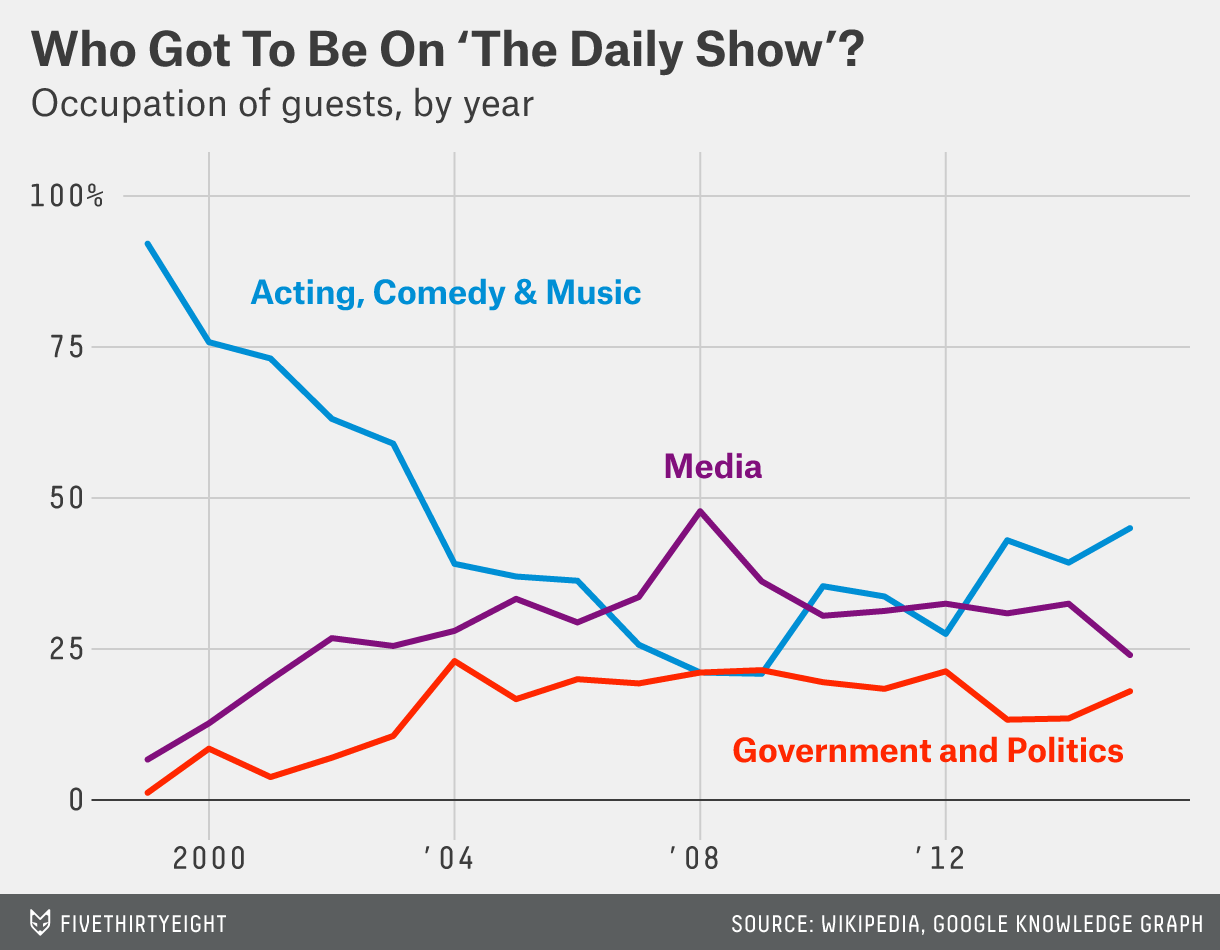

In [128]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [129]:
import seaborn as sns
sns.__version__

'0.9.0'

In [130]:
flat_df1= pd.DataFrame(crosstab_profession.to_records())
flat_df1

,Year,"Acting, Comedy & Music",Government and Politics,Media,Other
0,1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
1,2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2,2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
3,2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
4,2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
5,2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
6,2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
7,2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
8,2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963
9,2008,0.2073170731707317,0.20121951219512196,0.4695121951219512,0.12195121951219512


In [141]:
flat_df1=flat_df1.drop(['Other'],axis=1)
flat_df1.head()

,Year,"Acting, Comedy & Music",Government and Politics,Media
0,1999,0.9036144578313253,0.012048192771084338,0.06626506024096386
1,2000,0.7396449704142012,0.08284023668639054,0.1242603550295858
2,2001,0.7261146496815286,0.03821656050955414,0.19745222929936307
3,2002,0.6226415094339622,0.06918238993710692,0.2641509433962264
4,2003,0.5602409638554217,0.10240963855421686,0.2469879518072289


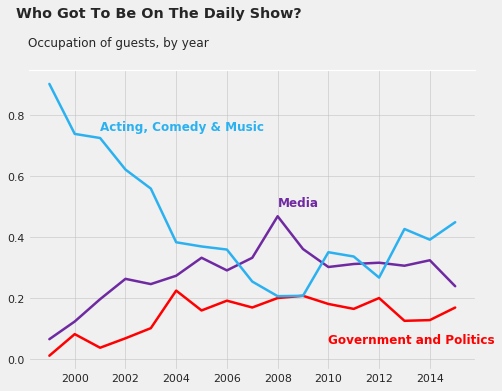

In [221]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
sns.set(style="ticks")
sns.set(rc={'axes.facecolor':'#F0F0F0', 'figure.facecolor':'#F0F0F0'})
plt.figure(figsize=(8,5.5))
ax=sns.lineplot(data=flat_df1, y='Media',x='Year', color='#6f2aa1', linewidth=2.5)
ax=sns.lineplot(data=flat_df1, y='Government and Politics',x='Year', color='red', linewidth=2.5)
ax=sns.lineplot(data=flat_df1, y='Acting, Comedy & Music',x='Year', color='#2bb1f0', linewidth=2.5)

plt.suptitle('Who Got To Be On The Daily Show?', x=0.35, y=1.04,fontweight="bold", )
plt.title('Occupation of guests, by year', x=0.2, y=1.06)
ax.spines['right'].set_color('#F0F0F0')
ax.spines['left'].set_color('#F0F0F0')
ax.spines['bottom'].set_color('#F0F0F0')
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(linestyle="-", linewidth=0.5, color='#bdbdbd', zorder=-10)

ax.tick_params(which='major', width=0.25)
ax.tick_params(which='major', length=1.0)
ax.tick_params(which='minor', width=0.1, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')


plt.text(x=2008, y= 0.5, s='Media' ,color='#6f2aa1', weight='bold')
plt.text(x=2010, y= 0.05, s='Government and Politics' ,color='red', weight='bold')
plt.text(x=2001, y= 0.75, s='Acting, Comedy & Music' ,color='#2bb1f0',weight='bold');




**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.